In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Basic subplots

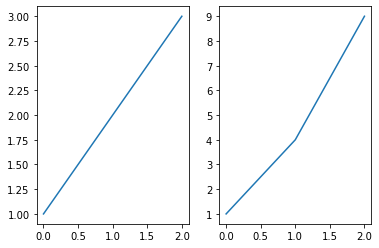

In [3]:
fig = plt.figure(2)

x = [0, 1, 2]

data = [1, 2, 3]
data2 = [1, 4, 9]

ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(data)
ax2.plot(x, data2)

plt.show()

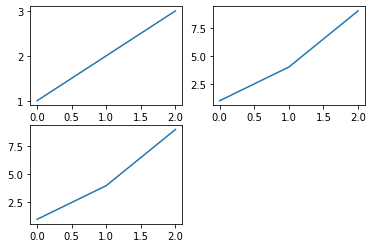

In [4]:
fig = plt.figure(3)

x = [0, 1, 2]

data = [1, 2, 3]
data2 = [1, 4, 9]

ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

ax.plot(x, data)
ax2.plot(x, data2)
ax3.plot(x, data2)

plt.show()

In [5]:
housing_raw = pd.read_csv('data/housing_data.csv',
                          parse_dates=['period_begin', 'period_end'],
                          dtype = {'total_homes_sold':"Int32", 'region_name':'category'})

In [8]:
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622339 entries, 0 to 622338
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   region_name               622339 non-null  category      
 1   period_begin              622339 non-null  datetime64[ns]
 2   period_end                622339 non-null  datetime64[ns]
 3   total_homes_sold          567839 non-null  Int32         
 4   inventory                 616247 non-null  float64       
 5   active_listings           616905 non-null  float64       
 6   age_of_inventory          616247 non-null  float64       
 7   median_active_list_price  616513 non-null  float64       
 8   months_of_supply          561319 non-null  float64       
dtypes: Int32(1), category(1), datetime64[ns](2), float64(5)
memory usage: 37.5 MB


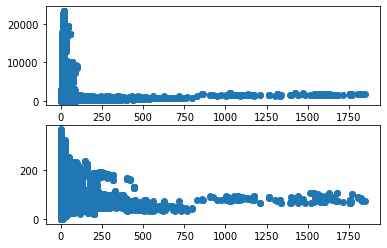

In [13]:
fig, ax = plt.subplots(2, 1)

ax[0].scatter(housing_raw.loc[:, 'months_of_supply'], housing_raw.loc[:, 'inventory'])
ax[1].scatter(housing_raw.loc[:, 'months_of_supply'], housing_raw.loc[:, 'age_of_inventory'])

# More subplots

In [14]:
ca_housing = (
    housing_raw
    .loc[housing_raw['region_name'].str.contains("CA")]
    .assign(region_name = housing_raw['region_name'].str[0:-11])
    .set_index('period_begin')
    .sort_index()
)

In [15]:
ca_housing_pivot = (
    ca_housing
    .pivot_table(index='period_begin',
                 columns='region_name',
                 values = 'median_active_list_price')
    .assign(CA_average = lambda dff: dff.mean(axis = 1))
)

In [17]:
ca_housing_markets = ca_housing_pivot.loc[:, ['San Francisco', 
                                              'Los Angeles',
                                              'San Diego',
                                              'Tulare']]

In [18]:
ca_housing_markets

region_name,San Francisco,Los Angeles,San Diego,Tulare
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,225395.8
2017-01-09,1233393.7,614061.0,621737.5,227729.1
2017-01-16,1239977.0,617311.0,625820.8,229060.4
2017-01-23,1247977.0,620644.3,629491.6,229806.2
2017-01-30,1253310.4,624541.6,632824.0,230139.5
...,...,...,...,...
2022-03-28,1289875.0,906783.0,901649.6,387928.9
2022-04-04,1289916.6,906783.1,902899.8,388951.8
2022-04-11,1290250.0,906782.4,902899.8,389863.7


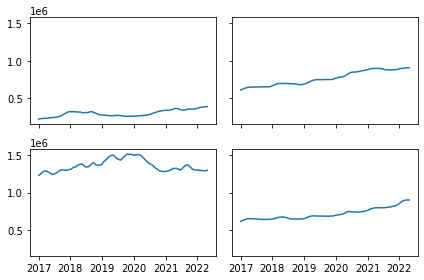

In [21]:
fig, ax = plt.subplots(2, 2, sharex='all', sharey = 'all')

ax[0][0].plot(ca_housing_markets.index, ca_housing_markets['Tulare'])
ax[0][1].plot(ca_housing_markets.index, ca_housing_markets['Los Angeles'])
ax[1][0].plot(ca_housing_markets.index, ca_housing_markets['San Francisco'])
ax[1][1].plot(ca_housing_markets.index, ca_housing_markets['San Diego'])

plt.tight_layout()

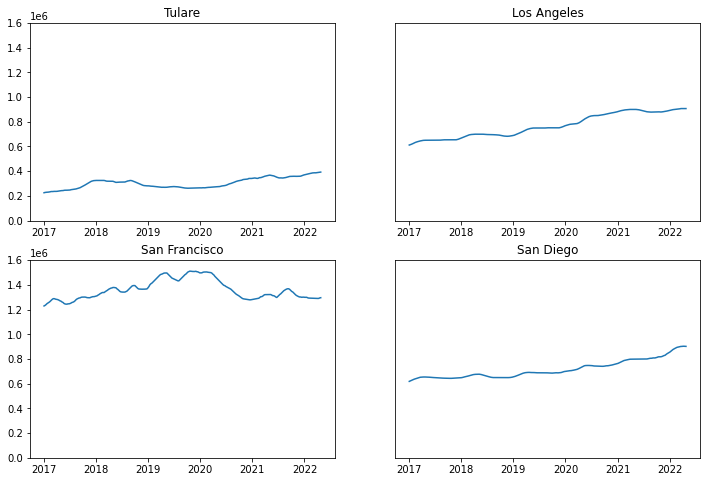

In [22]:
# Iterate and Add
fig = plt.figure(figsize = (12, 8))

plot_list = ['Tulare', 'Los Angeles', 'San Francisco', 'San Diego']

ax_list = []

nrows, ncols = (2, 2)

for i in range(1, len(plot_list) + 1):
    ax = fig.add_subplot(nrows, ncols, i)
    ax.plot(ca_housing_markets.index, ca_housing_markets[f'{plot_list[i-1]}'])
    ax.set_ylim(0, 1_600_000)

    ax.set_title(f'{plot_list[i-1]}')
    ax_list.append(ax)

    if (i-1) % 2 != 0:
        ax.set_yticks([])

ax_list[0].get_shared_x_axes().join(ax_list[0], *ax_list)
ax_list[0].get_shared_y_axes().join(ax_list[0], *ax_list)